In [1]:
%load_ext watermark

In [2]:
%watermark -a "E. Kaan Ulgen" -p numpy,scipy,matplotlib,pandas,scikit-learn

E. Kaan Ulgen 

numpy 1.16.2
scipy 1.5.4
matplotlib 3.1.0
pandas 1.0.4
sklearn 0.23.2


In [3]:
from IPython.display import Image
%matplotlib inline

# Denetimsiz Öğrenme - Kümeleme Algoritmaları

- Bu ders kapsamında 3 farklı denetimsiz öğrenme algoritması incelenecek:
    - Hiyerarşik Kümeleme
    - Gaussian Mixture Model (GMM)
    - Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

### Hiyerarşik Kümeleme

- k merkezli kümele yönteminin bir dezavantajı, küme sayısının önceden belirlenmesidir. Bu dezavantajı ortadan kaldırmak için hiyerarşik kümeleme geliştirilmiştir.
- **Hiyerarşik kümeleme** algoritmasının temel mantığı, benzer özniteliklerin bir araya gelmesine veya tam tersine bölünmesine dayanmaktadır.
- Bu çalışma prensibime göre hiyerarşik küme analizinde **birleştirici (agglomerative)** ve **bölücü (divisive)** olmak üzere iki temel yaklaşım mevcuttur. 
- **Tüme varım (bottom up)** olarak da bilinen birleşitirici yaklaşımda, başlangıçta tüm nesneler birbirlerinden ayrıdır. Yani eldeki verinin herbiri ayrı bir küme olarak kabul edilirek işe başlanır. Ardından benzer özniteliklere sahip kümeler bir araya gelerek tek bir küme elde etmeye çalışır. **Tümden gelim (top bottom)** yaklaşımında ise tüme varım metodunun aksine ayrıştırıcı yaklaşım hakimdir. Bu yaklaşımda başlangıçta tek bir küme vardır. Her aşamada uzaklık/benzerliklere göre nesneler ana kümeden ayrılırak, farklı alt kümelere ayrılmaktadır. Süreç sonucunda her veri bir küme olur.

- Hiyerarşik kümeleme analizide, veriler arasındaki benzerlik ve uzaklık hesaplamaları her adımda yinelerek yapılmaktadır. Bu algoritmada küme sayısına ihtiyaç duyulmaması hız için bir avantajdır. 
- Hesaplanan uzaklık/ benzerlik değerlerinden oluşan matris, seçilen bağlantı yönteminin kullanılmasına temel teşkil etmektedir. Birleştirici hiyerarşik kümeleme modelini dikkkate alırsak ilk olarak ilgili verilerin birbirlerine göre uzaklık bilgisini içeren uzaklık matrisi veya benzerlik matrisi hesaplanır.

- Hiyerarşik kümeleme analizinde kullanılan en etkin görselleştirme aracı dendrogram'lardır. Dendrogram, hiyerarşik kümeleme yöntemiyle elde edilen sonuçların kolaylıkla anlaşılmasını sağlamaktadır.

Birleştirici (agglomerative) hiyerarşik küme algoritmasını ele alırsak: Bu yöntemde her birim başlangıçta ayrı bir küme olarak kabul edilir ve benzer birimler bir araya getirilerek n birim aşamalı olarak sırasıyla n, n-l, n-2, n-r kümeye yerleştirilir. 

Algoritmanın temel çalışma yapısı (Barış doğan doktora tezi):
- 1) n tane birey n tane küme olmak üzere işlemlere başlanır.
- 2) En yakın iki küme ($d_{ij}$) değeri en küçük olan) birleştirilir.
- 3) Küme sayısı bir indirgenerek yinelenmiş uzaklıklar matrisi bulunur. 
- 4) 2. ve 3. adımlar (n-1) kez tekrarlanır.

Uygulamalarda sıklıklar kullanılan hiyerarşik kümeleme yöntemleri/algoritmaları şunlar:
    - Bağlantı Temelli Teknikler: 
        * Tek bağlantı(single linkage) / En yakın komşu yöntemi (nearest neighbor)
        * Tam Bağlantı (complete linkage) / En uzak komşu yöntemi (furthest neighbor)
        * Ortalama Bağlantı (average linkage)
    - Varyans Temelli Teknikler
        * Ward Yöntemi (Ward's linkage)
    - Merkezileştirme Temelli Teknikler:
        * Medyan Bağlantı (median linkage)
        * Merkezi Yöntemi (centroid linkage)

#### Tek bağlantı(single linkage) / En yakın komşu yöntemi (nearest neighbor)

- Tek bağlantı iki yada fazla veri birleşerek bir küme oluşturduğunda birleşen ilgili veriler ile diğer veriler arasındaki uzaklık, birleşen verilerin hangisi, diğer verilere en yakınsa bu uzaklık temel alınarak kullanılır.
$$ d(u,v) = min(d(u[i], v[j]) $$

- Tek Bağlantı tekniğin dezavantajı, işlemlerin uzun sürmesidir.

#### Tam Bağlantı (complete linkage) / En uzak komşu yöntemi (furthest neighbor)

- Tam bağlantı yönteminde veriler arasındaki en büyük uzaklık dikkate alınmaktadır.


$$ d(u,v) = max(d(u[i], v[j]) $$


- Yani en uzak komşuluk olarak da bilinen bu teknikte iki küme arasındaki uzaklık olarak her kümedeki eleman çiftleri arasındaki uzaklığın en büyüğü ele alınmaktadır. 
  
- Tam Bağlantı tekniğinde aynı küme içindeki bireylerin uzaklıklarının belli bir değerden küçük olması durumunda tüm kümelerin doğru bir şekilde oluşturulması gerçekleşmeyebilir.

- En Uzak Komşuluk Yöntemi veri setinde uç noktara duyarlıdır.

#### Ortalama Bağlantı (average linkage)

- İki kümedeki verilerin birbirleri arasındaki uzaklığın ortalama bir ölçüsünü verir. Ortalama bağlantı, tek ve tam bağlantı yöntemleri arasıda uygun bir tercihtir.

- Tek Bağlantı yönteminde birbirine en yakın, Tam Bağlantı yönteminde ise birbirine en uzak komşularda dikkate alınır. Bu yöntemde aşırı değerlerin etkisine karşı hassastır. Ortalama bağlantı yöntemi bu dezavantajdan kurtulmak için kullanılmaktadır.

$$ d(u,v) = \sum_{i,j}(\frac{d(u[i], v[j]}{|u|*|v|}) $$

#### Ward Yöntemi (Ward's linkage)

- Ward yöntemi, küme uzaklıklarının belirlenmesinde varyans analizi yaklaşımını kullanır. Temelde, kümeler içindeki minimum varyans koşulunun optimizasyonuna dayanmaktadır.

- Hiyerarşik kümeleme yaklaşımında iki küme birleşerek tek bir küme oluşturduğunda hataların kareler toplamında artış hesaplanır. Her adımda bu artışı minimize etmeye çalışan optimazasyon işlemleri mevcuttur.

- Özetle, her aşamada elde edilen kümelerden hata kareler toplamı en küçük olanlar birleştirilir.

#### Medyan Bağlantı (median linkage)

- Uzaklık ölçüsü olarak kareli Euclid uzaklığının kullanılması ön şarttır. Merkezi bağlantı yöntemine benzer bir yaklaşımı vardır. Burada her kümenin kaç veriyi temsil ettiğinden bağımsız olarak  küme orta noktaları eşit olarak ağırlıklandırılır.

#### Merkezi Yöntemi (centroid linkage)

- Bu yöntemde iki küme arasındaki uzaklık ölçüsü olarak kareli Euclid uzaklığının kullanılması ön şarttır.

- Merkezi bağlantı yönteminde her küme, o andaki kümenin ağırlık noktası ile temsil edilir.

- İki küme birleştiğinde, ağırlık noktalarının birbirlerinden minimal uzaklıkta olması yeterlidir. 

- Bu yöntemin en önemli avantajı farklı nitelikteki gözlemlerden çok fazla etkilenmemesidir

### Uygulama-1

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [5]:
X = np.array([[5,3], [10,15], [15,12], [24,10], [30,30], [85,70], [71,80], [60,78], [70,55], [80,91],])

In [6]:
print(X)

[[ 5  3]
 [10 15]
 [15 12]
 [24 10]
 [30 30]
 [85 70]
 [71 80]
 [60 78]
 [70 55]
 [80 91]]


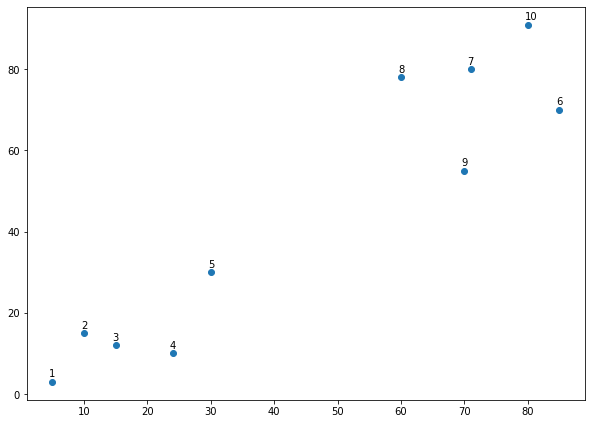

In [7]:
labels = range(1, 11)

plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1])

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', va='bottom')
plt.show()

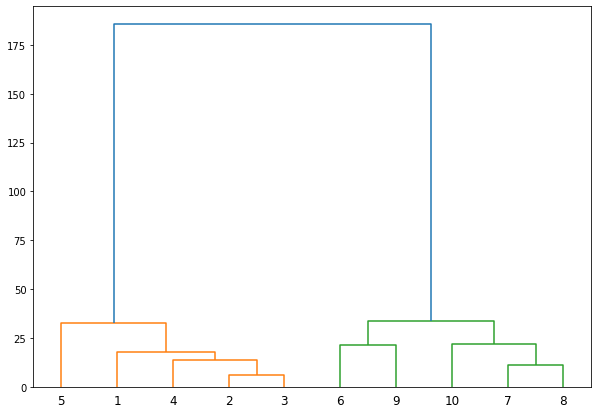

In [8]:
linked = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labels,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [9]:

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

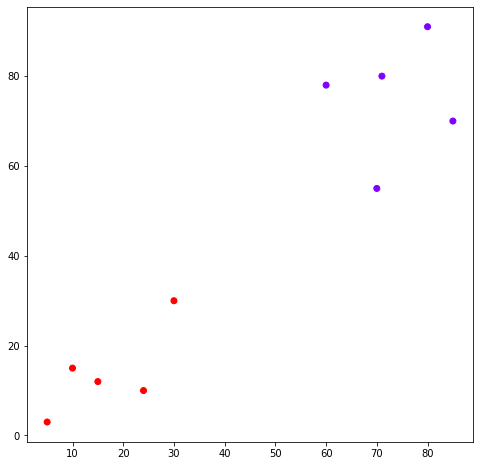

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

### Uygulama-2

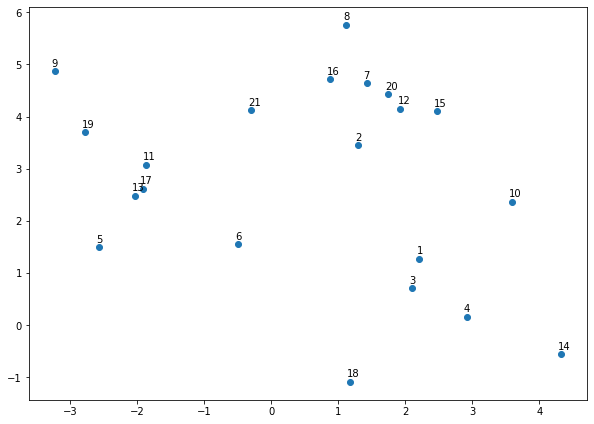

In [11]:
X, y = make_blobs(random_state=0, n_samples=21)

labels = range(1, 22)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1])

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', va='bottom')
plt.show()

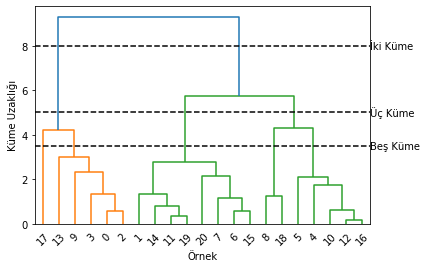

In [12]:
kume_baglantı = linkage(X, method="complete")

dendrogram(kume_baglantı)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [8,8], "--", c="k")
ax.plot(bounds, [5,5], "--", c="k")
ax.plot(bounds, [3.5, 3.5], "--", c="k")
ax.text(bounds[1], 8, "İki Küme", va="center", fontdict={"size":10})
ax.text(bounds[1], 5, "Üç Küme", va="center",  fontdict={"size":10})
ax.text(bounds[1], 3.5, "Beş Küme", va="center", fontdict={"size":10})

plt.xlabel("Örnek")
plt.ylabel("Küme Uzaklığı")
plt.show()

In [13]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster.fit_predict(X)

array([1, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 1, 0, 2, 2])

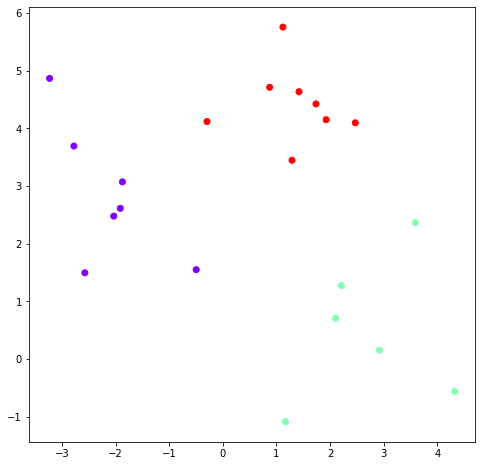

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

### Uygulama-3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [2]:
musteri = pd.read_csv('./shopping_data.csv')
musteri.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
musteri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Genre          200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
veri = musteri[["AnnualIncome","SpendingScore"]]

In [5]:
print(veri)

     AnnualIncome  SpendingScore
0              15             39
1              15             81
2              16              6
3              16             77
4              17             40
..            ...            ...
195           120             79
196           126             28
197           126             74
198           137             18
199           137             83

[200 rows x 2 columns]


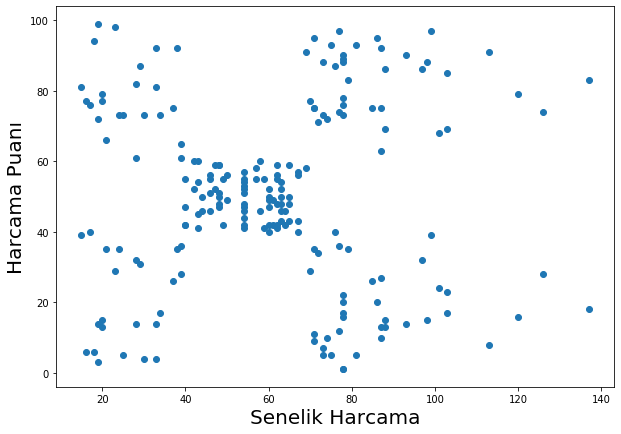

In [6]:
labels = range(1, 201) # Birleştirici hiyerarşik kümele analizinde başlaşgıçta her veri noktası küme olarak 
                       # kabul ediliyor. Bu sebeple ilgili noktaların takibini yapmak için onlara id atandı.
plt.figure(figsize=(10, 7))
plt.scatter(veri.AnnualIncome, veri.SpendingScore)
plt.xlabel("Senelik Harcama", fontsize=20)
plt.ylabel("Harcama Puanı", fontsize=20)

plt.show()

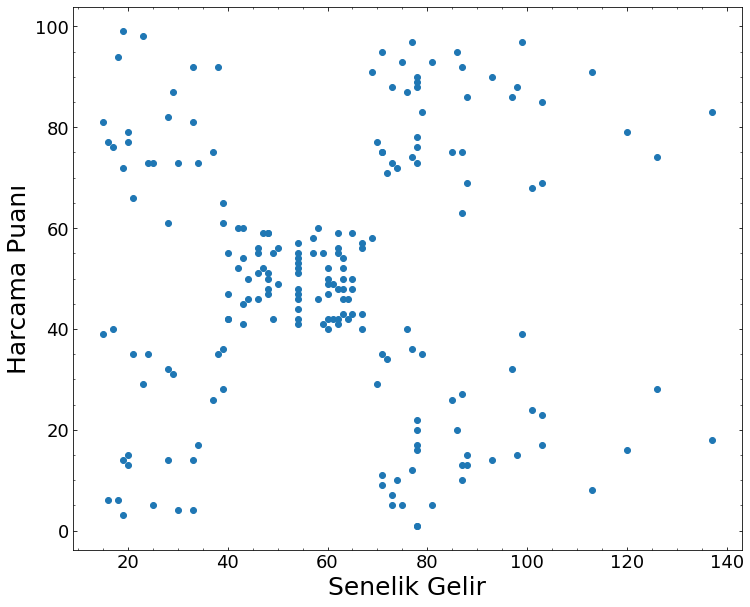

In [7]:
labels = range(1, 201) #
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 10))
ax1.scatter(veri.AnnualIncome, veri.SpendingScore)

ax1.set_xlabel(r'Senelik Gelir',fontsize=25)
ax1.set_ylabel(r'Harcama Puanı',fontsize=25)

ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(axis='x', which='minor', direction='in')
ax1.tick_params(axis='y', which='minor', direction='in')
ax1.tick_params(axis='x', which='major', direction='in')
ax1.tick_params(axis='y', which='major', direction='in')

plt.show()

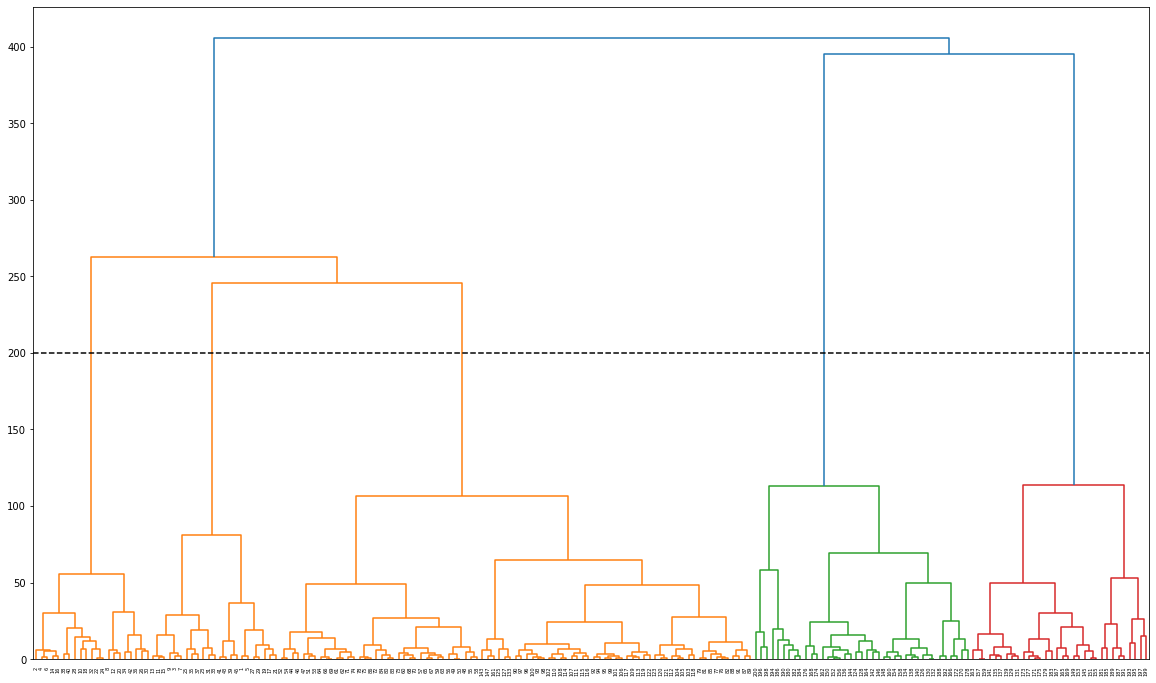

In [8]:
linked = linkage(veri, 'ward')

plt.figure(figsize=(20, 12))
dendrogram(linked,
            orientation='top',
            labels=labels,
            show_leaf_counts=True)
plt.axhline(200, ls="--", c="k")
plt.show()

In [9]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(veri)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

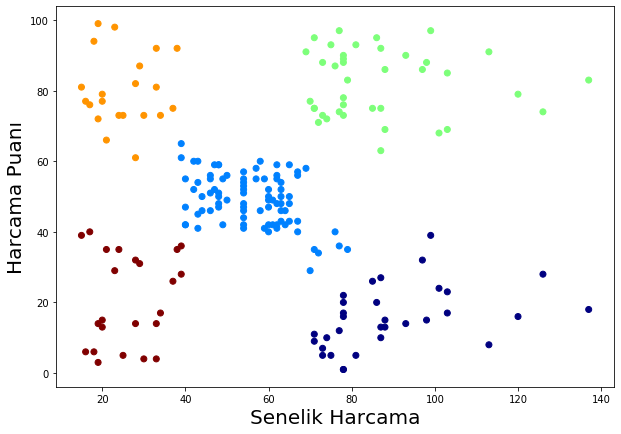

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(veri.AnnualIncome, veri.SpendingScore, c=cluster.labels_, cmap='jet')
plt.xlabel("Senelik Harcama", fontsize=20)
plt.ylabel("Harcama Puanı", fontsize=20)
plt.show()

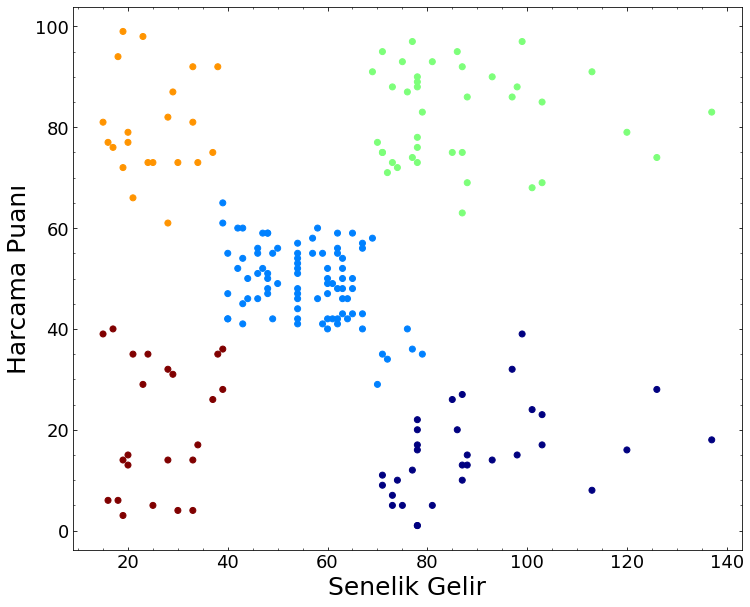

In [11]:
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 10))
ax1.scatter(veri.AnnualIncome, veri.SpendingScore, c=cluster.labels_, cmap='jet')

ax1.set_xlabel(r'Senelik Gelir',fontsize=25)
ax1.set_ylabel(r'Harcama Puanı',fontsize=25)

ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(axis='x', which='minor', direction='in')
ax1.tick_params(axis='y', which='minor', direction='in')
ax1.tick_params(axis='x', which='major', direction='in')
ax1.tick_params(axis='y', which='major', direction='in')

plt.show()

- Grafiğin sağ alt tarafı incelendiğinde geliri yüksek ama harcamaları az olan müşterileri görüyoruz. Bu müşteriler gelirlerini dikkatli bir şekilde harcıyorlar. Grafiğin sağ üst kısımında ise hem gelirleri hem de harcamaları yüksek müşteriler bulunuyor. Bunlar, şirketlerin hedeflediği türden müşteriler. Buna karşılık en fazla müşteri sayısının grafiğin orta kısımda yer aldığı görülmekte. Bunlar orta gelir grubuna sahip müşteriler. Şirketler, sayıca fazla oldukları gerçeğini göz önüne alarak bu müşterileri de hedefleyebilir.

### Uygulama-4

In [12]:
veri2 = pd.read_excel("./data_akbilgic.xlsx", skiprows=1, index_col=0)
veri2.head()

/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:296: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [13]:
veri2.drop("ISE", axis=1, inplace=True)
borsa = list(veri2.columns)
X = veri2.values

In [14]:
borsa

['ISE.1', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']

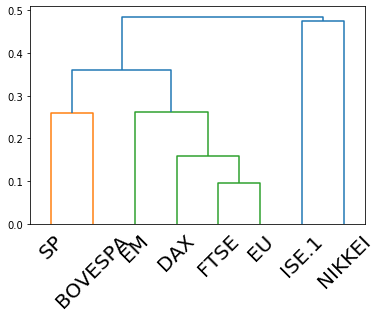

In [15]:
cluster = linkage(np.transpose(X), method="ward")
dendrogram(cluster, labels=borsa, leaf_rotation=45, leaf_font_size=20)
plt.show()

### Gaussian Mixture Model

- Gaussian (normal) dağılımı tek tepesi olan (unimodal) bir dağılımdır. Birden fazla tepe noktası olan bir veriyi modellemek istiyorsak, birden fazla Gauss dağılımını kullanabiliriz. Literatürde bu yaklaşıma karışım (mixture) denir. Özetle GMM, veriler üzerinde Gauss bileşenlerinin basit bir süperpozisyonudur.

- Karışım modelleri genel olarak bir veri noktasının hangi alt popülasyona (yada öbek/küme) ait olduğunu bilmeyi gerektirmez ve bu durum da modelin öbekleri otomatik öğrenmesine izin verir. İlgili verilerin hangi öbeğe ait olduğu bilinmedi için GMM analizi denetimsiz öğrenme algoritmalarından biridir.

- GMM analizi literatürde yaygın olarak kullanılan yöntemlerden biridir. Özellikle konuşma (ses) verilerinden özellik çıkarımı için yaygın olarak kullanılmaktadır.

In [16]:
Image(filename='./gmm_example.png', width=300)

NameError: name 'Image' is not defined

**GMM hakkında**: 
- Verilerin bir karışım modelliyle analiz edilebileceğinin bir kanıtı, ilgili verilerin çok modlu bir dağılım göstermesidir. Yani veri dağılımında birden fazla tepe vardır.

- Çok modlu bir dağılımı tek modlu (bir "tepe") modelle analiz etmeye çalışmak genellikle zayıf bir yaklaşım ortaya koymaktadır. Çok modlu dağılımların, sezgisel olarak düşünüldüğünde çoklu tek modlu dağılımlardan oluştuğunu varsayabiliriz. Bu varyasım altında çok modlu verileri, birçok tek modlu Gauss dağılımlarının karışımı olarak düşünebiliriz.

- Buna ek olarak GMM'ler Gauss modellerinin teorik ve hesaplama avantajlarının çoğunu korur ve büyük veri kümelerinin incelenmesinde pratik kolaylıklar sağlamaktadır.

In [17]:
Image(filename='./gmm_example2.png', width=600)

NameError: name 'Image' is not defined

**K-means algoritmasından farkları:**
- K-means algoritması her bir veri noktasını tek bir kümeyle ilişkilendiriken, GMM ise her bir veri noktasının ilgili kümelere ait olma olasıklarına göre ilişkilendirme yapar.

- K-means algoritması Euclid (öklid) uzaklığını temel alırken, GMM ise küresel olmayan dağımlımlarla başa çıkabilen **Mahalanobis** uzaklığı kullanmaktadır.

**Mahalanobis Uzaklığı:**
- Euclid uzaklığının genelleştirilmiş bir versiyonu olan Mahalanobis ölçütü, çok değişkenli vektörlerin çok boyutlu uzaklıklarının ölçülmesi esasına dayalı olarak hesaplanmaktadır. Temelini, merkezi parametre ölçütü ve varyans-kovaryans matrisi oluşturmaktadır.

- Mahalanobis ölçütünde varyans - kovaryans matrisi, değişkenler arası ilişkinin tespitini sağlamaktadır. Mahalanobis ölçütü, euclid uzaklığından karşılaşılan ölçek farklılıkları ve korelasyon problemini gidermektedir. Bu durum mahalanobis ölçütünün en büyük avantajıdır.


**Notlar:**
- **Olabilirlik Fonksiyonu (Likelihood Function - P(veri | θ)):** θ model olarak seçildiğinde söz konusu veri setini elde etme olasılığıdır.

- Olabilirlik, bir dağılımdan geldiği farzedilen bir veri setini alır, her bir veri noktasının olasılığını birbirine çarpar. Sonuç ne kadar yüksek çıkarsa, bu verinin o dağılımdan gelme olasılığı o kadar yüksek demektir.

$$ \mathcal{L(\theta)} = \prod_{i=1}^{m} P(x_i;\theta) $$

- Farklı parametre değerleri için verilerimizin olasılığı farklı olacaktır. Doğru parametrelere sahipsek, verilerimiz hatalı parametrelere sahip modelimizde daha yüksek olasılığa sahip olacaktır. Bu nedenle olasılığı parametrelerimizin (θ) bir fonksiyonu olarak yazıyoruz.

-------------------------
- **Maksimum Olabilirlik Kestirimi (Maximum likelihood Estimation -MLE):** Istatistikte tüm anakütleler kendilerine karşılık gelen bir olasılık dagılımı ile tanımlanırlar. 

- Temelinde yatan fikir: "Rastsal bir olayın gerçekleşmesi, o olayın gerçekleşme olasılıgı en yüksek olay olmasındandır."

- Bu yöntem 1920'li yıllarda, Sir Ronald A. Fisher tarafından bulunmuştur.

- Sonuç olarak, Bir modelin parametrelerini olabilirlik fonksiyonunu eniyileyerek tahminleyen yöntemdir.

**Matematiksel altyapısı:**
- Gerçek ançak bilinmeyen bir $P_{data}(x)$ veri üretim dağılımından bağımsız olarak seçtiğimiz, m örneklemden oluşan 

X = {$x^{(1)}$, ...$x^{(m)}$} kümesini düşünelim.

- $P_{model} (x;\theta)$, $\theta$ ile indeklenmiş bir uzaydaki olasılık dağımlımlarının parametrik ailesi olsun.

- $\theta$'nın maksimum olabilirlik kestirimi şu şekilde tanımlanır:

$$\theta_{ML} = argmax \  p_{model}(X;\theta)$$,

$$ \theta_{ML} = argmax \prod_{i=1}^{m} P_{model}(x^{(i)};\theta).$$

- Birçok olasılık üzerinden yapılan bu çarpım çeşitli sebepler yüzünden problem yaratabilir (Örneğin, küçümenlik - undeflow). Daha uygun bir eniyileme problemi elde etmek için benzerliğin logaritmasını alabiliriz. Benzerliğin logaritması, argmax sonucunu değiştirmez, aynı zamanda çarpım işlemini toplama çevirir.

$$ \theta_{ML} = argmax \sum_{i=1}^{m} log \ P_{model}(x^{(i)};\theta).$$

-------------------------


### Model

K bileşen için GMM,

$$ p(\vec{x}) = \sum_{k=1}^{K}N(\vec{x}|\mu_k,\Sigma_k)p(k) $$

- $p(k)$, karışım katsayılarını (veya karışım bileşen ağırlıkları) gösterir. 
- Bunların toplamı 1'e eşittir. $\sum_{k=1}^{K}p(k)=1$.
- $N(x|\mu_k,\Sigma_k) = p(x|k)$, belirli bir k öbeği verildiğinde x'in koşullu olasılığıdır. Bu aynı zamanda sürekli değişkenlerin (P-boyutlu) $x$ vektörü üzerinden tanımlanan çok değişkenli Gauss dağılımıdır. 

Bu bölümde olasılık tabanlı bir yaklaşım kullanarak, örneklemin olabilirliğini en büyük yapan bileşen parametreleriyle ilgileneceğiz.
- Amaç, GMM'nin log-olabilirlik değerini maksimize etmek.

$$ \ln \prod_{i=1}^{N} p(x_i) =  \ln\prod_{i=1}^{N}\Bigg\{ {\sum_{k=1}^{K}N(x_i|\mu_k,\Sigma_k)p(k)} \Bigg\} = \sum_{i=1}^{N} \ln \Bigg\{ {\sum_{k=1}^{K} N(x_i|\mu_k,\Sigma_k)p(k)} \Bigg\}$$ 

- Öbek parametrelerini hesaplamak için:
    * p(k),$\mu_k$,$\Sigma_k$,
    * Her bir örneklem(i) k öbeğine katkısı ile ağırlıklandılarak tüm örneklem toplanır.
    * $\sum_{k}p(k|x_i)=1$.
    * Bu durum, k öbeği için x'in koşulluğu olasılığıdır: $p(k|x)$ (Bayesian istatistikte posterior veya ardıl olarak da bilinir.)

Bayesian istatiği dikkate aldığımızda:

$$ p(k|x) = \frac{p(x|k)p(k)}{p(x)} $$

- $p(k|x)$ = Ardıl (Posterior)
- $p(x|k)$ = Olabilirlik Fonksiyonu (Likelihood Function)
- $p(k)$ = Öncül (priori)
- $p(x)$ = Veri

$$ p(k|x) = \frac{N(x|\mu_k,\Sigma_k)p(k)}{\sum_{k=1}^{K} N(x|\mu_k,\Sigma_k)p(k)} $$

### Expectation-Maximization (EM) -- Beklenti Maksimizasyonu (veya Enbüyütme)

Bir Gauss karışım modeli verildiğinde, amaç parametrelere göre olasılık fonksiyonunu maksimize etmektir (bileşenlerin ortalamaları ve kovaryansları ve karıştırma katsayılarından oluşur).

- Ortalama $\mu_k$, kovaryans $\Sigma_k$ ve karıştırma katsayıları $p(k)$ ile başlayın,

    * Beklenti maksimizasyonu, E-adımı (beklenti) ve M-adımı (maksimizasyon) olarak iki adımın art arda tekrarlanmasıyla gerçekleşir. 
    * E-adımı, parametrelerin o anki tahminlerini kullanarak bir log-olabilirlik beklentisi fonksiyonu oluşturur. 
    * M-adımı, parametre değerlerini log-olabilirlik beklentisini maksimum yapacak şekilde günceller.
    * Beklenti maksimizasyon işlemi tahmindeki hata miktarı belirli bir oranın altına düşene kadar devam eder.

### BIC ve AIC kriteri

#### Akaike Bilgi Kriteri (Akaika Information Criteria)

- Akaike bilgi kriteri, bir modelin başarısını belirlemek için kullanılan bir metriktir. Akaike kriteri, 1974 yılında Hirotugu Akaike tarafından geliştirilmiştir. 

- Gaussian Karışım Modelinde, veri dağılımını açıklayan en uygun gauss bileşen (n_component) sayısını belirlemek için kullanılır.

- Doğrudan bir modelin başarısını verebildiği gibi, farklı modellerin karşılaştırılamasında da kullanılmaktadır.

$$ AIC = 2k - 2In(\mathcal{L}) $$

- Burada $\mathcal{L}$, maksimum olabilirlik fonksiyonunu göstermektedir.
- **Olabilirlik Fonksiyonu (Likelihood Function - P(veri | θ)):** θ model olarak seçildiğinde söz konusu veri setini elde etme olasılığıdır.
- Yukarıda da belirtildiği gibi AIC ne kadar küçükse model de o kadar anlamlıdır. Farklı modeller karşılaştırılırken en düşük AIC değerine sahip model tercih edilir.
- 2k terimi, AIC değerini yükseltmektedir. Bu durum değişken eklemeyi cezalandırdığı anlamına gelmektedir. Yani model içerisinde daha az parametre kullanımı gürültüden kurtulma anlamına gelmektedir.
- Eğer veri seti çok az ise AIC daha fazla parametreye sahip modelin seçilmesine neden olur. Bu durumu ortadan kaldırmak için AIC düzeltmesi yapılmaktadır.

$$ AICc = AIC + \frac{2k ( k + 1)}{n - k - 1}$$

- Burada **n: Gözlem sayısı**,
- **k: parametre sayısıdır**

- Unutulmamalıdır ki AICc, veri sayısı modeldeki parametre sayısına oranlandığında <40 ise kullanılmaldır. Aksi durumda AIC tercih edilmeldir. 

- AIC veya AICc değerleri, pozitif veya negatif olabilmektedir. 

#### Bayes Bilgi Kriteri (Bayesian Information Criterion)

- Bayes Bilgi Kriteri, bir modelin başarısını ölçmek için kullanılan bir metriktir. 1978 yılında Gideon Schwarz tarafından önerildiği için literatürde Schwarz ölçütü (Schwarz Information Criterion - SIC) olarak da bilinmektedir.

- Gaussian Karışım Modelinde, veri dağılımını açıklayan en uygun gauss bileşen (n_component) sayısını belirlemek için kullanılır.

$$ BIC = k In(n) - 2In(\mathcal{L})$$

- *n: gözlem sayısı*
- *k: modelde kullanılan parametre sayısı.*
- *L: Modelin doğruluğu durumunda gözlem verisinin **olabilirlik fonksiyonun** (likelihood function) maksimize edilmiş değeridir.*

- Bayes bilgi kriterinin, $k In(n) $ kısmı AIC'den farklılık göstermektedir. AIC kriterinin ceza terimi örneklem sayısının büyük olduğu verilerde yetersiz kalmaktadır. Bu durumda Bayes Bilgi Kriteri, modele fazladan değişken eklemeyi daha şiddetli cezalandırmaktadır. 

- **Sonuç olarak en küçük BIC değerlerine sahip model en iyi model olarak seçilmektedir.**

### Uygulama-5

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [31]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
X

array([[ 2.50064460e-01,  6.48826703e+00],
       [-2.69798647e+00,  2.52194722e+00],
       [-2.90007604e+00,  3.06877291e+00],
       [ 7.02950576e-01,  4.31427482e+00],
       [-2.53563494e+00,  2.38449945e+00],
       [-1.70297829e+00,  7.80540956e+00],
       [ 2.22322228e+00,  8.38773426e-01],
       [ 7.93137001e-03,  4.17614316e+00],
       [-1.79041773e+00,  3.02668532e+00],
       [ 1.76747403e+00,  1.26987864e+00],
       [-9.49424332e-01,  7.81974467e+00],
       [ 2.51921931e+00,  1.87335276e-01],
       [ 2.33812285e+00,  3.43116792e+00],
       [-2.39482483e+00,  3.39806103e+00],
       [-7.91981675e-01,  2.95679593e+00],
       [ 3.22881491e+00,  1.13171965e+00],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.62350489e+00,  4.09867867e-01],
       [ 1.21767506e+00,  3.89290127e+00],
       [-1.22768985e+00,  3.54666555e+00],
       [-1.06406044e+00,  3.53554556e+00],
       [-2.07216196e+00,  2.66329169e+00],
       [-1.95483315e+00,  7.15134224e+00],
       [ 1.

In [33]:
X = X[:, ::-1] 
X

array([[ 6.48826703e+00,  2.50064460e-01],
       [ 2.52194722e+00, -2.69798647e+00],
       [ 3.06877291e+00, -2.90007604e+00],
       [ 4.31427482e+00,  7.02950576e-01],
       [ 2.38449945e+00, -2.53563494e+00],
       [ 7.80540956e+00, -1.70297829e+00],
       [ 8.38773426e-01,  2.22322228e+00],
       [ 4.17614316e+00,  7.93137001e-03],
       [ 3.02668532e+00, -1.79041773e+00],
       [ 1.26987864e+00,  1.76747403e+00],
       [ 7.81974467e+00, -9.49424332e-01],
       [ 1.87335276e-01,  2.51921931e+00],
       [ 3.43116792e+00,  2.33812285e+00],
       [ 3.39806103e+00, -2.39482483e+00],
       [ 2.95679593e+00, -7.91981675e-01],
       [ 1.13171965e+00,  3.22881491e+00],
       [ 1.59701749e+00, -1.80822253e+00],
       [ 4.09867867e-01,  1.62350489e+00],
       [ 3.89290127e+00,  1.21767506e+00],
       [ 3.54666555e+00, -1.22768985e+00],
       [ 3.53554556e+00, -1.06406044e+00],
       [ 2.66329169e+00, -2.07216196e+00],
       [ 7.15134224e+00, -1.95483315e+00],
       [ 4.

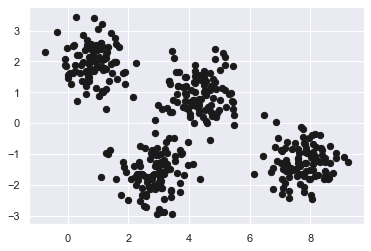

In [34]:
plt.scatter(X[:, 0], X[:, 1], c="k", s=40);

In [35]:
from sklearn.mixture import GaussianMixture

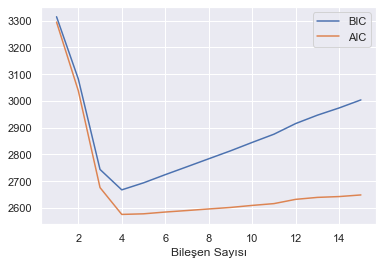

In [36]:
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Bileşen Sayısı');

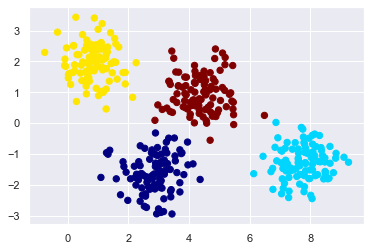

In [37]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=0).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='jet');

In [38]:
probs = gmm.predict_proba(X)
print(probs[:15].round(3))

[[0.    0.469 0.    0.531]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.014 0.    0.    0.986]
 [1.    0.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.997 0.    0.    0.003]]


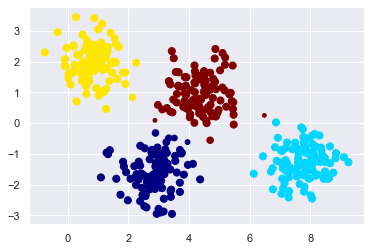

In [39]:
size = 50 * probs.max(1) ** 2  
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='jet', s=size);

In [40]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

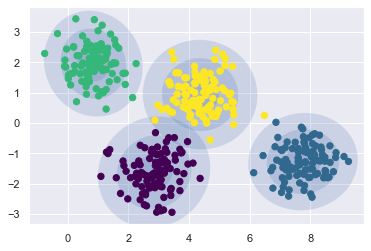

In [41]:
plot_gmm(gmm, X)

### Uygulama-6

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


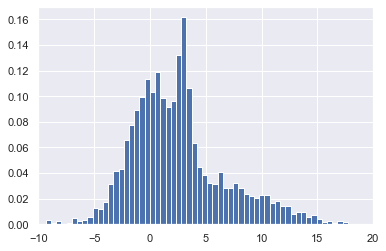

In [42]:
np.random.seed(2)
x = np.concatenate([np.random.normal(0, 2, 2000),
                    np.random.normal(5, 5, 2000),
                    np.random.normal(3, 0.5, 600)])

x = np.array(x)
plt.hist(x, 80, normed=True)
plt.xlim(-10, 20);

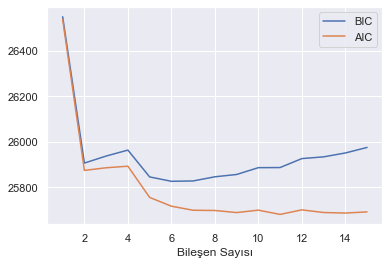

In [43]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 16)
models = [GaussianMixture(n,  max_iter=1000,  random_state=3).fit(x.reshape(-1, 1))
          for n in n_components]

plt.plot(n_components, [m.bic(x.reshape(-1, 1)) for m in models], label='BIC')
plt.plot(n_components, [m.aic(x.reshape(-1, 1)) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Bileşen Sayısı');

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


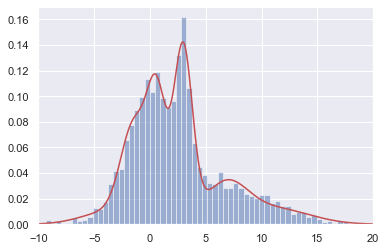

In [44]:
clf = GaussianMixture(6, max_iter=1000,  random_state=3).fit(x.reshape(-1, 1))
xpdf = np.linspace(-10, 20, 1000).reshape(-1, 1)
density = np.exp(clf.score_samples(xpdf))

plt.hist(x, 80, normed=True, alpha=0.5)
plt.plot(xpdf, density, '-r')
plt.xlim(-10, 20);

In [45]:
clf.means_

array([[ 2.96690528],
       [11.13178436],
       [-1.44938909],
       [ 6.774151  ],
       [ 0.61416585],
       [-3.47661122]])

In [46]:
clf.covariances_

array([[[ 0.6898126 ]],

       [[10.10773478]],

       [[ 1.33861932]],

       [[ 3.75556994]],

       [[ 0.77258927]],

       [[ 6.4436762 ]]])

In [47]:
clf.weights_

array([0.27973724, 0.0974572 , 0.20172538, 0.14455929, 0.21223518,
       0.0642857 ])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


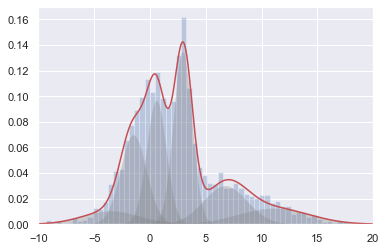

In [48]:
from scipy import stats

plt.hist(x, 80, normed=True, alpha=0.3)
plt.plot(xpdf, density, '-r')

for i in range(clf.n_components):
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0],
                                       np.sqrt(clf.covariances_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(-10, 20);

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

- DBSCAN, Martin Ester, Hans-Peter Kriegel, Jörg Sander ve Xiaowei XU tarafından 1996 yılında önerilmiştir. 
- Yoğunluk temelli bir kümeleme algoritmasıdır.
- DBSCAN algoritması, veri noktalarının iki ya da çok boyutlu uzayda birbirleri ile olan komşuluklarını ortaya çıkarma temeline dayanır. Veritabanı, uzaysal bakış açısı ile ele aldığı için çoğunlukla uzaysal (spatial) verilerin analizinde kullanılmaktadır.

- Algoritma yoğun bölgelerin bulunarak kümelenmesi, seyrek bölgelerin ise parazit olarak nitelendirilmesi temel fikrine dayanmaktadır.

- Veri uzayında  yoğun ve seyrek bölgelerin bulunmasında kullanıcı tarafından en başta tanımlanan ve analiz boyunca aynı kalan iki temel parametre mevcuttur. Bunlar epsilon (yarıçap) ve MinNts (minimum points - minimum nokta sayısı)'dir.

- Veri uzayında rastgele seçilen bir noktadan başlayan işlemde, bu noktanın merkez olarak alındığı yarıçap içerisideki noktaların sayısı, önceden tanımlanan MinNts değerine eşit veya büyük ise, bu bölge yoğun olarak nitelendirilir ve başlangıç kümesi oluşturulur.

- Aşağıdaki şekilde olduğu gibi kare noktalar merkez olmak üzere, $\epsilon$ değeri içerisinde kalan noktalar $\epsilon$-komşuluk olarak isimlendirilir.

- Bir nesnenin tanımlanan $\epsilon$-komşu sayısı, başlangıçta tanımlanan MinNts değerine eşit veya büyükse bu nesne çekirdek nesne olarak isimlendirilir.

- Eğer kontrol edilen nesne daha önce bir kümeye dahil edilmiş ise işlem yapmadan diğer nesneye geçer. Eğer nesne daha önce kümelenmemiş ise, bir bölge sorgusu (Region Query) yaparak nesnenin Eps komşuluğundaki komşularını bulur. Komşu sayısı MinPts’den fazla ise, bu nesne ve komşularını yeni bir küme olarak adlandırır. Daha sonra, önceden kümelenmemiş her bir komşu için yeni bölge sorgusu yaparak yeni komşular bulur. Bölge sorgusu yapılan noktaların komşu sayıları MinPts’den fazla ise kümeye dahil eder. 

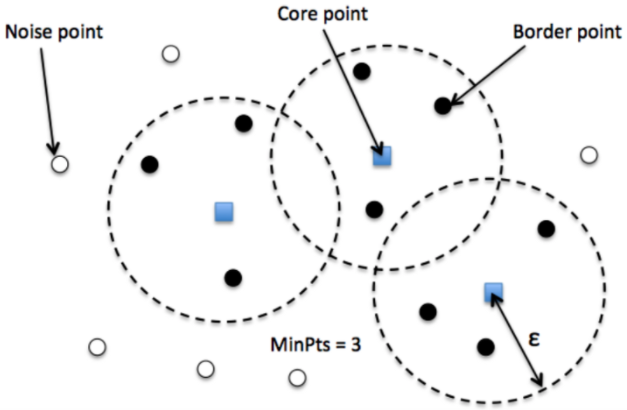

In [49]:
Image(filename='./dbscan.png', width=400)

### Uygulama-7

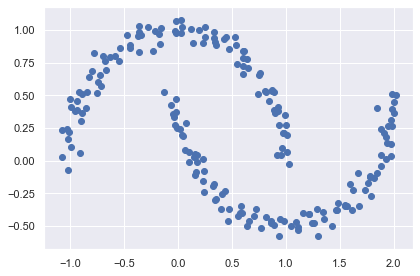

In [50]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

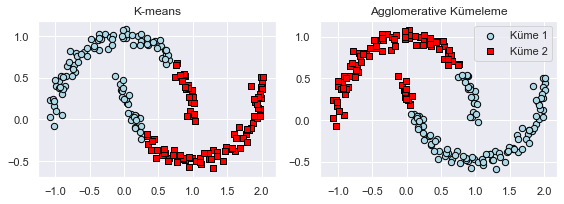

In [51]:
from sklearn.cluster import KMeans

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='Küme 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='Küme 2')
ax1.set_title('K-means')

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='Küme 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='Küme 2')
ax2.set_title('Agglomerative Kümeleme')
plt.legend()
plt.tight_layout()
plt.show()

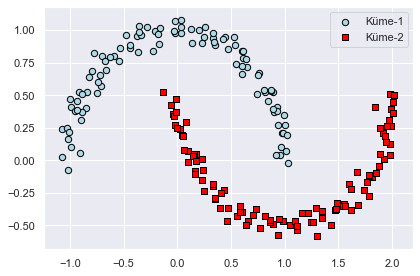

In [52]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')

y_db = db.fit_predict(X)

plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='Küme-1')

plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='Küme-2')
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
db.labels_

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [54]:
db.core_sample_indices_

array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

### Kaynaklar
- Haldun Akpınar, DATA, Papatya Bilim
- https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
- İlker Arslan, Python ile Veri Bilimi
- Metin Bilgin, Makine Öğrenmesi, Papatya Bilim
- Barış Doğan, BANKALARIN GÖZETİMİNDE BİR ARAÇ OLARAK KÜMELEME ANALİZİ: TÜRK BANKACILIK SEKTÖRÜ İÇİN BİR UYGULAMA (Doktora Tezi)
- Nazmiye Yalçın, KÜMELEME ANALİZİ VE UYGULAMASI, (Yüksek Lisans Tezi)
- https://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE
- Edouard Duchesnay, Tommy Löfstedt, Statistics and Machine Learning in Python
- Özgür Baştürk Ders Notları, Astronomide Sayısal Çözümleme-II
- A. Talha Yalta Ders Notları, Ekonometrik Modelleme (TÜBA - Açık Ders Malzemesi)
- Ian Goodfellow, Yoshua Bengio, Aaron Courville, Derin Öğrenme, Buzdağı Yayınevi
- https://towardsdatascience.com/introduction-to-aic-akaike-information-criterion-9c9ba1c96ced
- https://scikit-learn.org/stable/modules/mixture.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
- Turgay Tugay BİLGİN ve Yılmaz ÇAMURCU, "DBSCAN, OPTICS ve K-Means Kümeleme Algoritmalarının Uygulamalı Karşılaştırılması"